## 3.8.목 안간 날
p167~190

###### is_unique,reindex,fill,select,sort,rank
###### apply

In [6]:
!start .

[ 데이터 ]
7.5	3.6	3.5	3.3	1.5
7.4	3.2	3	2.8	1.2
6.6	2.9	2	2	1.1
7.7	3	2.2	2.2	1
7.9	3.1	2.3	2.3	1.2
7.7	3.3	2.6	2.5	1.3
7.7	3	2.3	2.2	1.4
7.1	3.2	2	2.1	1.4
7	3.1	2.1	2	1.2
7.9	3.6	2.5	2.5	1.6
7.8	3.5	2.5	2.4	3
7.4	3.4	2.1	2.1	2.7
7.5	3	2.1	2.1	2.5
7.9	3	2	1.9	1.9

[ 문제 ]
1. 다음의 데이터를 읽어들여 다음과 같은 프레임 형태로 변경
	20대	30대	40대	50대	60세이상

In [35]:
# 2000년	7.5	3.6	3.5	3.3	1.5
# 2001년	7.4	3.2	3	2.8	1.2
# 2002년	6.6	2.9	2	2	1.1
#  ...
# 2011년	7.4	3.4	2.1	2.1	2.7
# 2012년	7.5	3	2.1	2.1	2.5
# 2013년	7.9	3	2	1.9	1.9

1. 
2. 2010년부터의 20~40대 실업률만 추출하여 새로운 데이터프레임을 만들어라 
3. 전체 데이터에서 각 년도별 20대와 30대의 실업률 차이를 구하라(20대 - 30대)
4. 모든 실업률 지수를 소수점 둘째 짜리로 표현하여라
5. 연령별 실업률의 평균과 연도별 실업률 평균을 각각 구하여라(np.average)
6. 전체 데이터에서 20대 실업률이 7이하인 연도만 출력하여라. 
7. 각 년도 별 총 실업률에서 20대 실업률이 차지하고 있는 비율을 출력하여라.(함수생성)

#### 1

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [2]:
df= pd.read_table("data/ex_180308.txt", header= None); df

,0,1,2,3,4
0,7.5,3.6,3.5,3.3,1.5
1,7.4,3.2,3.0,2.8,1.2
2,6.6,2.9,2.0,2.0,1.1
3,7.7,3.0,2.2,2.2,1.0
4,7.9,3.1,2.3,2.3,1.2
5,7.7,3.3,2.6,2.5,1.3
6,7.7,3.0,2.3,2.2,1.4
7,7.1,3.2,2.0,2.1,1.4
8,7.0,3.1,2.1,2.0,1.2
9,7.9,3.6,2.5,2.5,1.6


In [3]:
cols= ['%d대'%(10*i) for i in range(2,6)]
cols.append('60대이상')
indexes= ['%d년'%i for i in range(2000,2014)]
df.columns= cols
df.index= indexes
df

,20대,30대,40대,50대,60대이상
2000년,7.5,3.6,3.5,3.3,1.5
2001년,7.4,3.2,3.0,2.8,1.2
2002년,6.6,2.9,2.0,2.0,1.1
2003년,7.7,3.0,2.2,2.2,1.0
2004년,7.9,3.1,2.3,2.3,1.2
2005년,7.7,3.3,2.6,2.5,1.3
2006년,7.7,3.0,2.3,2.2,1.4
2007년,7.1,3.2,2.0,2.1,1.4
2008년,7.0,3.1,2.1,2.0,1.2
2009년,7.9,3.6,2.5,2.5,1.6


#### lambda 예시
lambda 인자: 반환표현식

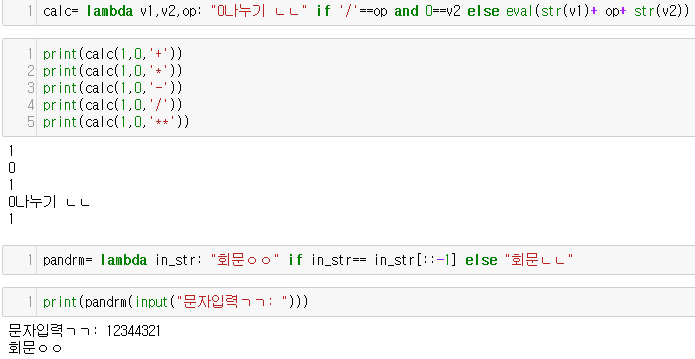

##### applymap
DataFrame. 2차원 이상. ex. 실수값을 문자열포맷으로 변환
###### 기존 map
1차원 list만 가능했었다

#### 3

In [5]:
df['20대']-df['30대']

2000년    3.9
2001년    4.2
2002년    3.7
2003년    4.7
2004년    4.8
2005년    4.4
2006년    4.7
2007년    3.9
2008년    3.9
2009년    4.3
2010년    4.3
2011년    4.0
2012년    4.5
2013년    4.9
dtype: float64

In [35]:
df.diff(-1,1) #20대- 30대. (범위_기본값1, 축)

,20대,30대,40대,50대,60대이상
2000년,3.9,0.1,0.2,1.8,NaN
2001년,4.2,0.2,0.2,1.6,NaN
2002년,3.7,0.9,0.0,0.9,NaN
2003년,4.7,0.8,0.0,1.2,NaN
2004년,4.8,0.8,0.0,1.1,NaN
2005년,4.4,0.7,0.1,1.2,NaN
2006년,4.7,0.7,0.1,0.8,NaN
2007년,3.9,1.2,-0.1,0.7,NaN
2008년,3.9,1.0,0.1,0.8,NaN
2009년,4.3,1.1,0.0,0.9,NaN


In [30]:
df.iloc[:,0:2].diff(-1,1)

,20대,30대
2000년,3.9,NaN
2001년,4.2,NaN
2002년,3.7,NaN
2003년,4.7,NaN
2004년,4.8,NaN
2005년,4.4,NaN
2006년,4.7,NaN
2007년,3.9,NaN
2008년,3.9,NaN
2009년,4.3,NaN


In [31]:
df.iloc[:,0:2].diff(-1,1)['20대']

2000년    3.9
2001년    4.2
2002년    3.7
2003년    4.7
2004년    4.8
2005년    4.4
2006년    4.7
2007년    3.9
2008년    3.9
2009년    4.3
2010년    4.3
2011년    4.0
2012년    4.5
2013년    4.9
Name: 20대, dtype: float64

In [47]:
#20대-40대, 30대-50대, 40대-60대이상
df.diff(-2,1)#.dropna(1)

,20대,30대,40대,50대,60대이상
2000년,4.0,0.3,2.0,NaN,NaN
2001년,4.4,0.4,1.8,NaN,NaN
2002년,4.6,0.9,0.9,NaN,NaN
2003년,5.5,0.8,1.2,NaN,NaN
2004년,5.6,0.8,1.1,NaN,NaN
2005년,5.1,0.8,1.3,NaN,NaN
2006년,5.4,0.8,0.9,NaN,NaN
2007년,5.1,1.1,0.6,NaN,NaN
2008년,4.9,1.1,0.9,NaN,NaN
2009년,5.4,1.1,0.9,NaN,NaN


In [46]:
df

,20대,30대,40대,50대,60대이상
2000년,7.5,3.6,3.5,3.3,1.5
2001년,7.4,3.2,3.0,2.8,1.2
2002년,6.6,2.9,2.0,2.0,1.1
2003년,7.7,3.0,2.2,2.2,1.0
2004년,7.9,3.1,2.3,2.3,1.2
2005년,7.7,3.3,2.6,2.5,1.3
2006년,7.7,3.0,2.3,2.2,1.4
2007년,7.1,3.2,2.0,2.1,1.4
2008년,7.0,3.1,2.1,2.0,1.2
2009년,7.9,3.6,2.5,2.5,1.6


#### 4

In [59]:
#응 안되 df+ 0.01-0.01

,20대,30대,40대,50대,60대이상
2000년,7.5,3.6,3.5,3.3,1.5
2001년,7.4,3.2,3.0,2.8,1.2
2002년,6.6,2.9,2.0,2.0,1.1
2003년,7.7,3.0,2.2,2.2,1.0
2004년,7.9,3.1,2.3,2.3,1.2
2005년,7.7,3.3,2.6,2.5,1.3
2006년,7.7,3.0,2.3,2.2,1.4
2007년,7.1,3.2,2.0,2.1,1.4
2008년,7.0,3.1,2.1,2.0,1.2
2009년,7.9,3.6,2.5,2.5,1.6


In [72]:
# 인자를 소수점이하 2자리로 반환
fmt00= lambda x: '%.2f'%x

In [74]:
# applymap: DataFrame용
df.applymap(fmt00)

,20대,30대,40대,50대,60대이상
2000년,7.50,3.60,3.50,3.30,1.50
2001년,7.40,3.20,3.00,2.80,1.20
2002년,6.60,2.90,2.00,2.00,1.10
2003년,7.70,3.00,2.20,2.20,1.00
2004년,7.90,3.10,2.30,2.30,1.20
2005년,7.70,3.30,2.60,2.50,1.30
2006년,7.70,3.00,2.30,2.20,1.40
2007년,7.10,3.20,2.00,2.10,1.40
2008년,7.00,3.10,2.10,2.00,1.20
2009년,7.90,3.60,2.50,2.50,1.60


In [73]:
# map: Series용
df['20대'].map(fmt00)

2000년    7.50
2001년    7.40
2002년    6.60
2003년    7.70
2004년    7.90
2005년    7.70
2006년    7.70
2007년    7.10
2008년    7.00
2009년    7.90
2010년    7.80
2011년    7.40
2012년    7.50
2013년    7.90
Name: 20대, dtype: object

In [75]:
# map은 DF에는 못 씀
df.map(fmt00)

AttributeError: 'DataFrame' object has no attribute 'map'

#### 5

In [76]:
df

,20대,30대,40대,50대,60대이상
2000년,7.5,3.6,3.5,3.3,1.5
2001년,7.4,3.2,3.0,2.8,1.2
2002년,6.6,2.9,2.0,2.0,1.1
2003년,7.7,3.0,2.2,2.2,1.0
2004년,7.9,3.1,2.3,2.3,1.2
2005년,7.7,3.3,2.6,2.5,1.3
2006년,7.7,3.0,2.3,2.2,1.4
2007년,7.1,3.2,2.0,2.1,1.4
2008년,7.0,3.1,2.1,2.0,1.2
2009년,7.9,3.6,2.5,2.5,1.6


In [85]:
df.mean(0)

20대      7.507143
30대      3.207143
40대      2.371429
50대      2.314286
60대이상    1.642857
dtype: float64

In [87]:
# Series 함수 적용은  map
df.mean(0).map(fmt00)

20대      7.51
30대      3.21
40대      2.37
50대      2.31
60대이상    1.64
dtype: object

In [108]:
df.mean(1)

2000년    3.88
2001년    3.52
2002년    2.92
2003년    3.22
2004년    3.36
2005년    3.48
2006년    3.32
2007년    3.16
2008년    3.08
2009년    3.62
2010년    3.84
2011년    3.54
2012년    3.44
2013년    3.34
dtype: float64

In [95]:
Series(df.mean(1))

2000년    3.88
2001년    3.52
2002년    2.92
2003년    3.22
2004년    3.36
2005년    3.48
2006년    3.32
2007년    3.16
2008년    3.08
2009년    3.62
2010년    3.84
2011년    3.54
2012년    3.44
2013년    3.34
dtype: float64

##### 이걸 np.average로?

In [96]:
# 연령별
np.average(df, 0)

array([7.50714286, 3.20714286, 2.37142857, 2.31428571, 1.64285714])

In [97]:
# 연도별
np.average(df, 1)

array([3.88, 3.52, 2.92, 3.22, 3.36, 3.48, 3.32, 3.16, 3.08, 3.62, 3.84,
       3.54, 3.44, 3.34])

#### 6

In [98]:
df

,20대,30대,40대,50대,60대이상
2000년,7.5,3.6,3.5,3.3,1.5
2001년,7.4,3.2,3.0,2.8,1.2
2002년,6.6,2.9,2.0,2.0,1.1
2003년,7.7,3.0,2.2,2.2,1.0
2004년,7.9,3.1,2.3,2.3,1.2
2005년,7.7,3.3,2.6,2.5,1.3
2006년,7.7,3.0,2.3,2.2,1.4
2007년,7.1,3.2,2.0,2.1,1.4
2008년,7.0,3.1,2.1,2.0,1.2
2009년,7.9,3.6,2.5,2.5,1.6


In [103]:
df[df['20대']<=7]

,20대,30대,40대,50대,60대이상
2002년,6.6,2.9,2.0,2.0,1.1
2008년,7.0,3.1,2.1,2.0,1.2


In [114]:
df[df['20대']<=7]

,20대,30대,40대,50대,60대이상
2002년,6.6,2.9,2.0,2.0,1.1
2008년,7.0,3.1,2.1,2.0,1.2
